## 修改通道数据
备注： 本方法属于侵入式修改，一般不建议这么直接修改类实例，不助于软件开发维护。但对个人来说没有太多影响。

In [70]:
import mne
import platform
import numpy as np
print("MNE VERSION:",mne.__version__) # 注意MNE版本，低版本可能会出现不兼容报错的情况
print("PYTHON VERSION:",platform.python_version())
raw = mne.io.read_raw_fif("/Users/reallo/Downloads/anonymize_raw_tsss.fif",preload=True,verbose=0) # preload设置为True，才能使得Raw实例中的_data属性可见

MNE VERSION: 1.3.0
PYTHON VERSION: 3.8.5


Using normal I/O
Using normal I/O
Using matplotlib as 2D backend.
Opening raw browser...
Using normal I/O


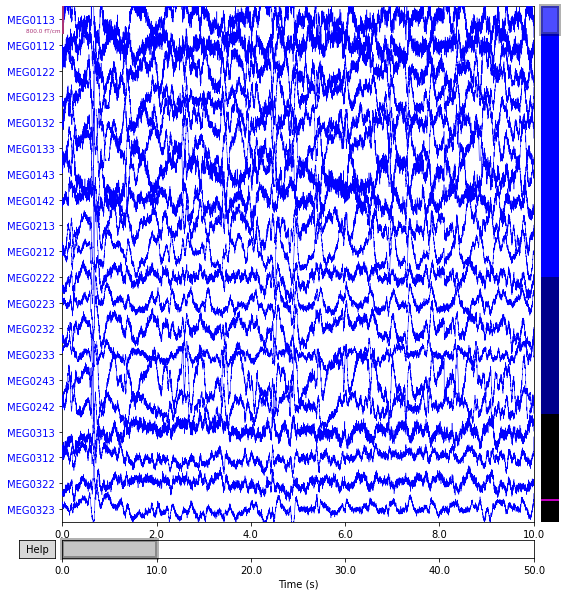

In [2]:
raw.plot();

In [49]:
# 查看raw实例中是否存在_data
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_raw_file',
 '

In [51]:
raw._data.shape

(368, 50001)

In [71]:
# 获取想修改通道的Index
ecg_index = raw.info['ch_names'].index('ECG061')
print("ecg index:",ecg_index)

ecg index: 351


In [72]:
raw._data[351] = np.random.randint(0,10,size=(50001,))
# raw._data[0] = np.random.randint(0,10,size=(50001,))

In [73]:
raw._data

array([[ 7.40638048e-12,  4.91113971e-12, -1.02310563e-12, ...,
         3.81316185e-11,  1.79319736e-11, -1.83411513e-11],
       [-3.29944152e-11, -3.16230364e-11, -1.52573371e-11, ...,
         5.69694553e-11,  6.38468014e-11,  3.18472465e-11],
       [-7.87111574e-13, -1.61575803e-12, -1.03539911e-12, ...,
         1.23651855e-15,  1.17732948e-13,  2.55823035e-13],
       ...,
       [ 6.56545162e-02,  6.62374496e-02,  6.80482388e-02, ...,
        -1.78682804e-01, -1.79946423e-01, -1.79511309e-01],
       [ 7.93282986e-01,  7.92990923e-01,  7.91505575e-01, ...,
         1.89130902e+00,  1.89275146e+00,  1.89328074e+00],
       [ 1.89461470e+00,  1.89423919e+00,  1.89214587e+00, ...,
         4.26559544e+00,  4.26762486e+00,  4.26842213e+00]])

In [68]:
raw.get_data()

array([[ 1.00000000e+00,  0.00000000e+00,  7.00000000e+00, ...,
         5.00000000e+00,  4.00000000e+00,  7.00000000e+00],
       [-3.29944152e-11, -3.16230364e-11, -1.52573371e-11, ...,
         5.69694553e-11,  6.38468014e-11,  3.18472465e-11],
       [-7.87111574e-13, -1.61575803e-12, -1.03539911e-12, ...,
         1.23651855e-15,  1.17732948e-13,  2.55823035e-13],
       ...,
       [ 6.56545162e-02,  6.62374496e-02,  6.80482388e-02, ...,
        -1.78682804e-01, -1.79946423e-01, -1.79511309e-01],
       [ 7.93282986e-01,  7.92990923e-01,  7.91505575e-01, ...,
         1.89130902e+00,  1.89275146e+00,  1.89328074e+00],
       [ 1.89461470e+00,  1.89423919e+00,  1.89214587e+00, ...,
         4.26559544e+00,  4.26762486e+00,  4.26842213e+00]])

In [ ]:
raw.save("modify_ecg_raw.fif")